In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.neighbors import KNeighborsClassifier

In [3]:
ckd=pd.read_csv('kidney_disease_complete_2c.csv')

In [ ]:
import seaborn as sns
#get correlations of each feature in dataset
corrmat= ckd.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
sns.heatmap(ckd[top_corr_features].corr(),annot=True)

In [ ]:
ckd.hist()

<Axes: xlabel='classification', ylabel='count'>

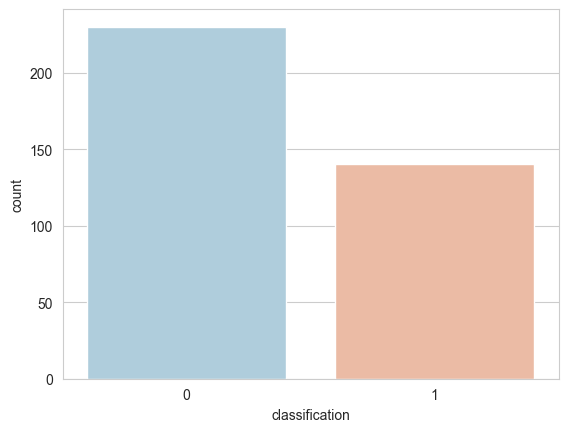

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='classification', data=ckd, palette='RdBu_r')

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()

In [12]:
x=ckd.drop([ "classification"],axis=1)
y=ckd["classification"]

In [13]:
from sklearn.model_selection import cross_val_score
knn_scores=[]
for k in range(1,24):
  knn_classifier = KNeighborsClassifier(n_neighbors=k)
  score=cross_val_score(knn_classifier,x,y,cv=10)
  knn_scores.append(score.mean())

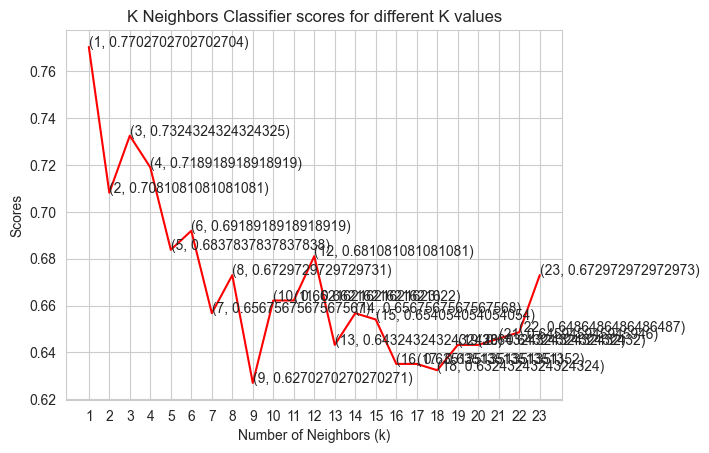

In [14]:
plt.plot([k for k in range(1, 24)], knn_scores, color = 'red')
for i in range(1,24):
  plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
  plt.xticks([i for i in range(1,24)])
  plt.xlabel('Number of Neighbors (k)')
  plt.ylabel('Scores')
  plt.title('K Neighbors Classifier scores for different K values')

In [15]:
knn_classifier = KNeighborsClassifier(n_neighbors=1)
  #n_neighbours=1 because its the first neighbour with the highest accuracy
score=cross_val_score(knn_classifier,x,y,cv=10)
knn_scores.append(score.mean())

In [16]:
knn_scores

[0.7702702702702704,
 0.7081081081081081,
 0.7324324324324325,
 0.718918918918919,
 0.6837837837837838,
 0.6918918918918919,
 0.6567567567567567,
 0.6729729729729731,
 0.6270270270270271,
 0.6621621621621623,
 0.6621621621621622,
 0.681081081081081,
 0.6432432432432433,
 0.6567567567567568,
 0.654054054054054,
 0.6351351351351351,
 0.6351351351351352,
 0.6324324324324324,
 0.6432432432432432,
 0.6432432432432432,
 0.645945945945946,
 0.6486486486486487,
 0.672972972972973,
 0.7702702702702704]

In [17]:
score.mean()

0.7702702702702704